# Random Forest Classification

## Dataset

### Layout

* Columns:
	* Age
	* EstimatedSalary
	* Purchased
* Rows: 100s of observations
	* Each row represents an observation if a customer purchased older SUVs from the company
		* Features:
			* Age
			* Estimated Salary
		* Dependent variable:
			* Purchased
				* 0 = Not purchased
				* 1 = Purchased

### Background

* One is a data scientist working for one's favorite automobile company
* The general manager of the company wants one to predict which previous customers will purchase the brand-new SUV just released by the company
* Marketing team will post ads on social media targeting them at customers likely to purchase a new SUV

## Goals

* Build a Random Forest classification model to predict if a customer purchases the new SUV

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset into Training Set and Test Set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
print(*X_train[:25], sep='\n')

[   44 39000]
[    32 120000]
[   38 50000]
[    32 135000]
[   52 21000]
[    53 104000]
[   39 42000]
[   38 61000]
[   36 50000]
[   36 63000]
[   35 25000]
[   35 50000]
[   42 73000]
[   47 49000]
[   59 29000]
[   49 65000]
[    45 131000]
[   31 89000]
[   46 82000]
[   47 51000]
[   26 15000]
[    60 102000]
[    38 112000]
[    40 107000]
[   42 53000]


In [5]:
print(*y_train[:25], sep='\n')

0
1
0
1
1
1
0
0
0
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
0


In [6]:
print(*X_test[:25], sep='\n')

[   30 87000]
[   38 50000]
[   35 75000]
[   30 79000]
[   35 50000]
[   27 20000]
[   31 15000]
[    36 144000]
[   18 68000]
[   47 43000]
[   30 49000]
[   28 55000]
[   37 55000]
[   39 77000]
[   20 86000]
[    32 117000]
[   37 77000]
[   19 85000]
[    55 130000]
[   35 22000]
[   35 47000]
[    47 144000]
[   41 51000]
[    47 105000]
[   23 28000]


In [7]:
print(*y_test[:25], sep='\n')

0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(*X_train[:25], sep='\n')

[ 0.58164944 -0.88670699]
[-0.60673761  1.46173768]
[-0.01254409 -0.5677824 ]
[-0.60673761  1.89663484]
[ 1.37390747 -1.40858358]
[1.47293972 0.99784738]
[ 0.08648817 -0.79972756]
[-0.01254409 -0.24885782]
[-0.21060859 -0.5677824 ]
[-0.21060859 -0.19087153]
[-0.30964085 -1.29261101]
[-0.30964085 -0.5677824 ]
[0.38358493 0.09905991]
[ 0.8787462  -0.59677555]
[ 2.06713324 -1.17663843]
[ 1.07681071 -0.13288524]
[0.68068169 1.78066227]
[-0.70576986  0.56295021]
[0.77971394 0.35999821]
[ 0.8787462  -0.53878926]
[-1.20093113 -1.58254245]
[2.1661655  0.93986109]
[-0.01254409  1.22979253]
[0.18552042 1.08482681]
[ 0.38358493 -0.48080297]


In [10]:
print(*X_test[:25], sep='\n')

[-0.80480212  0.50496393]
[-0.01254409 -0.5677824 ]
[-0.30964085  0.1570462 ]
[-0.80480212  0.27301877]
[-0.30964085 -0.5677824 ]
[-1.10189888 -1.43757673]
[-0.70576986 -1.58254245]
[-0.21060859  2.15757314]
[-1.99318916 -0.04590581]
[ 0.8787462  -0.77073441]
[-0.80480212 -0.59677555]
[-1.00286662 -0.42281668]
[-0.11157634 -0.42281668]
[0.08648817 0.21503249]
[-1.79512465  0.47597078]
[-0.60673761  1.37475825]
[-0.11157634  0.21503249]
[-1.89415691  0.44697764]
[1.67100423 1.75166912]
[-0.30964085 -1.37959044]
[-0.30964085 -0.65476184]
[0.8787462  2.15757314]
[ 0.28455268 -0.53878926]
[0.8787462  1.02684052]
[-1.49802789 -1.20563157]


## Training Random Forest Classification Model on Training Set

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting Test Set Results

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred_actual = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
print(*y_pred_actual[:25], sep='\n')

[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[1 0]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[0 0]
[1 1]
[0 0]


## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [15]:
print(cm)

[[63  5]
 [ 4 28]]


Results:

* $63$ true negatives
* $5$ false positives
* $4$ false negatives
* $28$ true positives

## Compute Accuracy Score

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.91

Results:

Model is $91\%$ accurate.

## Visualizing Training Set Results

In [17]:
from matplotlib.colors import ListedColormap
from opengood.py_ml_plot import setup_classification_plot

opengood.py_ml_plot imported


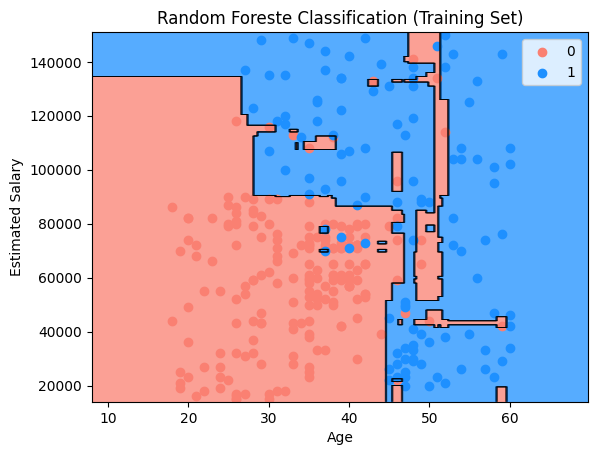

In [18]:
setup_classification_plot(
    x=X_train,
    y=y_train,
    cmap=ListedColormap(("salmon", "dodgerblue")),
    title="Random Forest Classification (Training Set)",
    x_label="Age",
    y_label="Estimated Salary",
    feature_scale=lambda x_set, y_set: (
        sc.inverse_transform(x_set), y_set
    ),
    predict=lambda x1, x2: (
        classifier.predict(
            sc.transform(
                np.array([x1.ravel(), x2.ravel()]).T)
        ).reshape(x1.shape)
    )
)
plt.show()

## Visualize Test Set Results

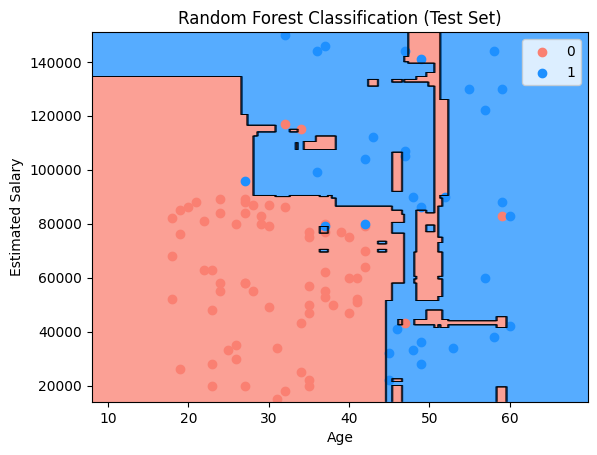

In [19]:
setup_classification_plot(
    x=X_test,
    y=y_test,
    cmap=ListedColormap(("salmon", "dodgerblue")),
    title="Random Forest Classification (Test Set)",
    x_label="Age",
    y_label="Estimated Salary",
    feature_scale=lambda x_set, y_set: (
        sc.inverse_transform(x_set), y_set
    ),
    predict=lambda x1, x2: (
        classifier.predict(
            sc.transform(
                np.array([x1.ravel(), x2.ravel()]).T)
        ).reshape(x1.shape)
    )
)
plt.show()

## Interpreting Results

* The following items outline the 2D plots:
	* The red region represents 0 classifier (customer who did not buy the SUV)
	* The blue region represents 1 classifier (customer who bought the SUV)
	* Each data point represents one customer
	* Red data points = 0 classifier
	* Blue data points = 1 classifier
* Correct prediction data points are where the data point color is the same as the region
* Incorrect prediction data points are where the data point color is different from the region
* Prediction boundary is the boundary between red and blue prediction regions
	* Where the classifier separates the two classes
* **Random Forest classification model is a non-linear classifier since forests contain splits forming leaves**
* The model caught most red data points in the red forest leaves and vice versa with blue data points

## Predict New Result

In [20]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]
